# Programação Linear

Plano de ataque pra hoje:

- Explicar o que é programação linear *muito brevemente*;
- Explicar o que são os problemas primal e dual associados a um programa linear;
- Resolver um problema de seleção de carteira.

### O que é programação linear?

No jargão matemático, um problema de programação é um problema de otimização. Linearidade aqui diz respeito às restrições de desigualdade.

Várias aplicações:

- Problemas de *matching* (*marriage market*, por exemplo);
- Problemas em teoria dos jogos;
- Problemas em finanças quantitativas;
- Problemas em transporte otimal;
- Problemas em matemática industrial (decisões de produção, planejamento);
- etc.

Talvez você já tenha ouvido falar de pesquisa operacional. Não é a mesma coisa que PL, mas a interseção entre as duas é grande.

### Desigualdades

Desigualdades lineares em $\mathbb{R}^{n}$ dividem o espaço em um **semiespaço** onde a desigualdade é satisfeita, e em outro semiespaço onde ela não é. Estamos sempre considerando um vetor $\mathbf{x} = (x, y, z, w, ...)$.

Exemplo: olhamos pra desigualdade $x + 2y \geq 4$ em $\mathbb{R}^2$.

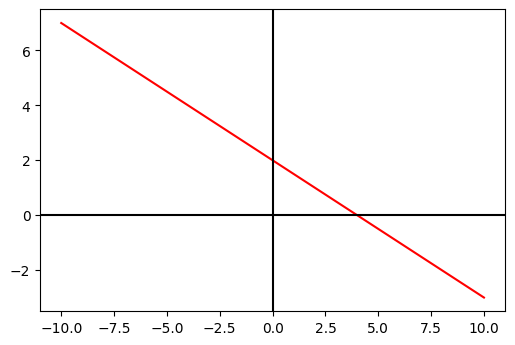

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 1000)
y = (4.0 - x) / 2

plt.rcParams['figure.dpi'] = 100

plt.plot(x, y, color='red')
plt.axhline(0, c='black')
plt.axvline(0, c='black')

Em $x + 2y = 4$, a linha azul, a desigualdade é satisfeita (é só uma igualdade). Vale estrita pra cima, e falha pra baixo. Se impusermos as restrições típicas ($x, y \geq 0$), ficamos só com os pontos do primeiro quadrante. Neste caso, o **conjunto viável** (ou *feasible set*) é dado por:

$$B = \{(x, y) \in \mathbb{R}^{2}: x + 2y \geq 4, x \geq 0, y \geq 0\}.$$

Se quiser pensar em economia, pode escrever $B(\mathbf{p}, w)$ como um conjunto orçamentário, onde o vetor de preços é dado por $\mathbf{p} = (1, 2)$ e a renda do cara é $w = 4$. Note que você teria que trocar a desigualdade pro problema ter graça, isto é, teria que impor $x + 2y \leq 4$, senão o cara é infinitamente rico, e não tem problema algum.

### Programas e Dualidade

Para termos um programa linear completamente caracterizado, precisamos especificar uma **função custo** (no jargão matemático/computeiro) ou **função objetivo** (no jargão econômico). Queremos determinar um ponto em $B$ que minimiza a função custo, por exemplo, a função $(x, y) \mapsto 2x + 3y$.

In [2]:
def colorFader(c1,c2,mix=0):
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2) #combs. convexas das cores extremais

c1='#1f77b4' #azul
c2='green' #verde

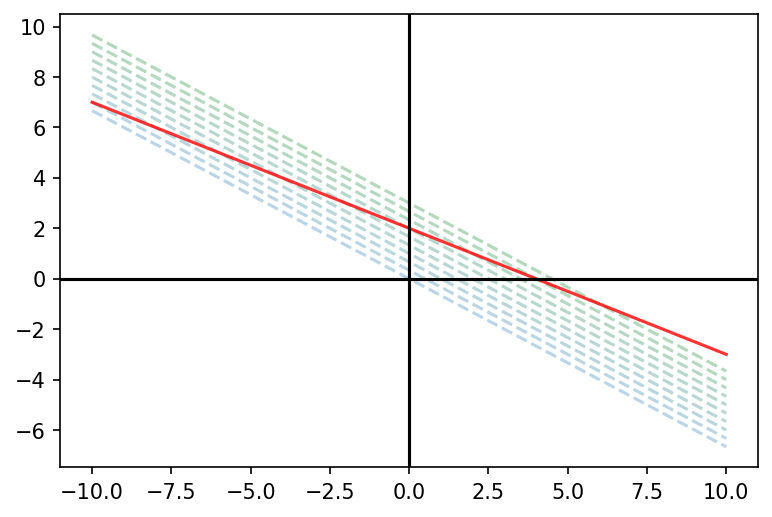

In [3]:
x = np.linspace(-10, 10, 1000)
y = (4.0 - x) / 2

levels = list(range(0, 10))

plt.rcParams['figure.dpi'] = 150

for level in levels:
    plt.plot(x, (level - 2*x)/3, '--', color=colorFader(c1,c2,level/11), alpha=0.3)

plt.plot(x, y, color='r', alpha=0.8)
plt.axhline(0, c='black')
plt.axvline(0, c='black')

Visualmente já está resolvido: a curva de nível $x + 2y = 6$ intercepta o vértice no canto superior direito. Então o custo é minimal quando $x = 0$ e $y = 2$. Dizemos então que $(0, 2)$ é **ideal** e que o **valor** do programa é $6$. Embora resolver visualmente não seja um procedimento matematicamente rigoroso, sugiro fortemente a leitura do texto *The Bitter Lesson*, do Rich Sutton. Um extrato abaixo:

*The biggest lesson that can be read from 70 years of AI research is that general methods that leverage computation are ultimately the most effective, and by a large margin.*

Pros curiosos, o algoritmo que ajuda a resolver problemas desse tipo chama-se algoritmo simplex.

A formulação mais geral possível vem agora. Trocamos a desigualdade $x + 2y \geq 4$ por uma **variável de folga** $w = x + 2y - 4$. Nosso **problema primal** é simplesmente:

$$\min_{\mathbf{x} \geq \mathbf{0}} \mathbf{cx}$$

sujeito a

$$\mathbf{Ax \leq b}.$$

Aqui, o vetor de custos é $\mathbf{c} = [2, 3, 0]$; lemos $\mathbf{x} \geq \mathbf{0}$ como $x, y, w \geq 0$. A restrição de desigualdade só diz que o vetor ideal tem que estar na interseção dos semiespaços.

Um exemplo simples de aplicação é o **problema da dieta**, que veremos abaixo.

**Problema da dieta.** Você tem duas opções de proteína: shitake e bife. 500 gramas de shitake dão uma unidade de proteína, ao passo que um bife fornece duas unidades de proteína. Você precisa de no mínimo quatro unidades de proteína pra não definhar gradativamente. Então uma dieta balanceada com shitake e bife é dada por $x + 2y \geq 4$, onde $x$ é o shitake e $y$ é o bife. Mas como não tem almoço de graça, digamos que 500 gramas de shitake custem dois mangos, e um bife custe três mangos. O custo da dieta é dado por $2x + 3y$. Como já vimos acima, vamos gastar seis mangos e a dieta ideal tem 0 cogumelos e 2 bifes.

In [4]:
from scipy.optimize import linprog

costs = [2, 3] #2x + 3y
A = [[-1, -2]] #troca pra forma padrão: -x-2y
b = [-4] #<= -4
x_bounds = (0, None) #x >=0
y_bounds = (0, None) #y >=0

res = linprog(costs, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds])

#Se eu não me engano, algoritmo de Karmarkar: supõe x > 0 e y > 0; tenta. Se falhar, testa x = 0. Se falhar, testa y = 0. Aí sim, se tudo falhar, põe (x, y) = (0, 0).

In [5]:
res

     con: array([], dtype=float64)
     fun: 5.999999999998245
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([-2.49711363e-12])
  status: 0
 success: True
       x: array([3.98175522e-12, 2.00000000e+00])

O mais interessante é que podemos reformular o programa do ponto de vista de um vendedor de suplementos farmacêuticos, o chamado **problema dual**. O vendedor escolhe um preço $p$ da pílula de proteína que maximiza seu lucro (aqui, suponho que ele não incorre em custo algum pra vender). Naturalmente, o consumidor tem que ser no máximo indiferente entre pílula e alimentos pra que vender seja factível, ou seja, o conjunto viável do vendedor é dado por:

$$B^{\star} = \{p \in \mathbb{R}: p \geq 0, p \leq 2, 2p \leq 3\} = \{p \in \mathbb{R}: 0 \leq p \leq 1.5\}.$$

Lucro é maximal em $p = 1.5$, e o valor é 6 de novo porque lucro é $4p$ (cara precisa de no mínimo 4 unidades de proteína). Um dos teoremas mais importantes de programação linear diz o seguinte: valor coincide nos problemas primal e dual. É o **teorema da dualidade**.

### Aplicação: Seleção de Carteira

**Problema de seleção de carteira.** Títulos federais pagam 5\% ao ano, títulos municipais pagam 6\% ao ano, e *junk bonds* (mobiliários de renda fixa) pagam 9\% ao ano. Seu chefe na firma te deu 100.000 mangos pra comprar uma carteira $(x, y, z)$ desses ativos. Ele também impôs as seguintes condições:

- Não mais de 20.000 mangos podem ser alocados em *junk bonds*.
- A qualidade média da sua carteira deve ser no mínimo igual à carteira que joga tudo em títulos municipais (*benchmark*). Então seu problema é maximizar

$$5x + 6y + 9z$$

em

- $x + y + z \leq 100.000$;
- $z \leq 20.000$;
- $z \leq x$;
- $x, y, z \geq 0$.

**Solução.** Temos que olhar pra nossa função objetivo e usar todas as desigualdades. Esse é o jogo.

- Primeiro passo: note que $5x + 6y + 9z = 6 \cdot (x + y + z) - x + 3z \leq 600.000 - x + 3z$.
- Segundo passo: note que $z \leq x \implies z - x \leq 0$, de sorte que: $600.000 - x + 3z = 600.000 - x + z + 2z \leq 600.000 + 2z$.
- Terceiro passo: como $z \leq 20.000$, devemos ter $600.000 + 2z \leq 640.000$.

Concluímos que $5x + 6y + 9z$ é **no máximo igual a** $640.000$. Com sorte, podemos encontrar $x, y, z$ factíveis (viáveis) que tornam a desigualdade uma igualdade.

- Primeiro passo: como $z$ tem o maior coeficiente, vamos apostar nele primeiro. Ponhamos $z = 20.000$.
- Segundo passo: como $x$ tem um coeficiente menor que $y$, não nos interessa muito ter ele na nossa carteira; então vamos pegar o menor valor possível de $x$, **respeitando** $z \leq x$, donde: $x = z = 20.000$.
- Terceiro e último passo: sobraram 60.000 do orçamento, e agora podemos jogar tudo em $y$, respeitando nosso orçamento total. Temos $y = 60.000$.

Algoritmo *greedy* -- faz a coisa "ótima" em cada etapa. Não é o mais eficiente, mas certamente é o mais intuitivo e óbvio pro ser humano implementar.

Note que:

In [6]:
5 * 20_000 + 6 * 60_000 + 9 * 20_000

640000

**Bam!** A carteira otimal é $(x, y, z) = (20.000, 60.000, 20.000)$.